# Trabalho de análise exploratoria de dados 

- os dados foram retirados do kaggle 

- Os dados são sobre Detecção de fraude em reclamações de seguros de veículos
- https://www.kaggle.com/datasets/shivamb/vehicle-claim-fraud-detection

In [72]:
# Importando as bibliotecas necessárias 

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [22]:
# Conjunto de dados sem manipulação para eventual consulta 
df_raw = pd.read_csv('../dados/fraud_oracle.csv')
df_raw.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [73]:
# Carregando o conjunto de dados e visualizando o mesmo

df = pd.read_csv('../dados/fraud_oracle.csv')
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [24]:
# Observando apenas as colunas 
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [25]:
# Traduzindo as colunas para manipular de forma mais fácil 
mapper = {'Month': 'Mes',
          'WeekOfMonth': 'SemanaDoMes',
          'DayOfWeek': 'DiaDaSemana',
          'Make': 'Marca',
          'AccidentArea': 'AreaDoAcidente',
          'DayOfWeekClaimed': 'DiaAlugado',
          'MonthClaimed': 'MesAlugado',
          'WeekOfMonthClaimed': 'SemanaDoMesAlugado',
          'Sex': 'Sexo',
          'MaritalStatus': 'EstadoCivil',
          'Age': 'Idade',
          'Fault': 'Culpa',
          'PolicyType': 'TipoDeApolice',
          'VehicleCategory': 'CategoriaDoVeiculo',
          'VehiclePrice': 'PrecoDoVeiculo',
          'FraudFound_P': 'FraudeEncontrada',
          'PolicyNumber': 'NumeroDaApolice',
          'Deductible': 'Franquia',
          'DriverRating': 'ClassificacaoDoMotorista',
          'Days_Policy_Accident': 'DiasDoAcidenteDaApolice',
          'PastNumberOfClaims': 'NúmeroAnteriorDeReivindicações',
          'AgeOfVehicle': 'IdadeDoVeiculo',
          'AgeOfPolicyHolder': 'IdadeDoTitular',
          'PoliceReportFiled': 'RelatorioPolicialArquivado',
          'WitnessPresent': 'Testemunha',
          'AgentType': 'TipoDeAgente',
          'NumberOfSuppliments': 'NumeroDeSuplimentos',
          'AddressChange_Claim': 'AlteraçãoDeEndereco',
          'NumberOfCars': 'NumeroDeCarros',
          'Year': 'Ano',
          'BasePolicy': 'ApoliceBasica'}

In [26]:
# Efetuando a troca dos nomes das colunas para pt-br
df.rename(columns = mapper, inplace = True)

In [71]:
# Verificando se há valores nulos no dataset
df.isnull().sum()

Mes                               0
SemanaDoMes                       0
DiaDaSemana                       0
Marca                             0
AreaDoAcidente                    0
DiaAlugado                        0
MesAlugado                        0
SemanaDoMesAlugado                0
Sexo                              0
EstadoCivil                       0
Idade                             0
Culpa                             0
TipoDeApolice                     0
CategoriaDoVeiculo                0
PrecoDoVeiculo                    0
FraudeEncontrada                  0
NumeroDaApolice                   0
RepNumber                         0
Franquia                          0
ClassificacaoDoMotorista          0
DiasDoAcidenteDaApolice           0
Days_Policy_Claim                 0
NúmeroAnteriorDeReivindicações    0
IdadeDoVeiculo                    0
IdadeDoTitular                    0
RelatorioPolicialArquivado        0
Testemunha                        0
TipoDeAgente                

In [27]:
# Visualizando o começo do dataset
df.T.head()

,0,1,2,3,4,5,6,7,8,9,...,15410,15411,15412,15413,15414,15415,15416,15417,15418,15419
Mes,Dec,Jan,Oct,Jun,Jan,Oct,Feb,Nov,Dec,Apr,...,Nov,Nov,Nov,Nov,Nov,Nov,Nov,Nov,Dec,Dec
SemanaDoMes,5,3,5,2,5,4,1,1,4,3,...,3,4,4,4,4,4,5,5,1,2
DiaDaSemana,Wednesday,Wednesday,Friday,Saturday,Monday,Friday,Saturday,Friday,Saturday,Tuesday,...,Sunday,Tuesday,Tuesday,Thursday,Friday,Friday,Thursday,Thursday,Monday,Wednesday
Marca,Honda,Honda,Honda,Toyota,Honda,Honda,Honda,Honda,Honda,Ford,...,Dodge,Honda,Pontiac,Mazda,Chevrolet,Toyota,Pontiac,Toyota,Toyota,Toyota
AreaDoAcidente,Urban,Urban,Urban,Rural,Urban,Urban,Urban,Urban,Urban,Urban,...,Urban,Rural,Urban,Urban,Urban,Urban,Urban,Rural,Urban,Urban


In [28]:
# Visualizando o final 
df.T.tail()

,0,1,2,3,4,5,6,7,8,9,...,15410,15411,15412,15413,15414,15415,15416,15417,15418,15419
NumeroDeSuplimentos,none,none,none,more than 5,none,3 to 5,1 to 2,none,3 to 5,3 to 5,...,more than 5,none,more than 5,1 to 2,1 to 2,none,more than 5,1 to 2,more than 5,1 to 2
AlteraçãoDeEndereco,1 year,no change,no change,no change,no change,no change,no change,no change,no change,no change,...,no change,no change,no change,no change,4 to 8 years,no change,no change,no change,no change,no change
NumeroDeCarros,3 to 4,1 vehicle,1 vehicle,1 vehicle,1 vehicle,1 vehicle,1 vehicle,1 vehicle,1 vehicle,1 vehicle,...,1 vehicle,1 vehicle,1 vehicle,1 vehicle,2 vehicles,1 vehicle,3 to 4,1 vehicle,1 vehicle,1 vehicle
Ano,1994,1994,1994,1994,1994,1994,1994,1994,1994,1994,...,1996,1996,1996,1996,1996,1996,1996,1996,1996,1996
ApoliceBasica,Liability,Collision,Collision,Liability,Collision,Collision,Collision,Collision,Collision,All Perils,...,Collision,All Perils,Liability,Liability,Collision,Collision,Liability,Collision,All Perils,Collision


In [29]:
# Verificando quantas linhas e colunas temos 
df.shape

(15420, 33)

In [30]:
# Estatisticas descritivas dos dados 
df.describe().round(2)

,SemanaDoMes,SemanaDoMesAlugado,Idade,FraudeEncontrada,NumeroDaApolice,RepNumber,Franquia,ClassificacaoDoMotorista,Ano
count,15420.00,15420.00,15420.00,15420.00,15420.00,15420.00,15420.00,15420.00,15420.00
mean,2.79,2.69,39.86,0.06,7710.50,8.48,407.70,2.49,1994.87
std,1.29,1.26,13.49,0.24,4451.51,4.60,43.95,1.12,0.80
min,1.00,1.00,0.00,0.00,1.00,1.00,300.00,1.00,1994.00
25%,2.00,2.00,31.00,0.00,3855.75,5.00,400.00,1.00,1994.00
50%,3.00,3.00,38.00,0.00,7710.50,8.00,400.00,2.00,1995.00
75%,4.00,4.00,48.00,0.00,11565.25,12.00,400.00,3.00,1996.00
max,5.00,5.00,80.00,1.00,15420.00,16.00,700.00,4.00,1996.00


In [31]:
# Variável de interesse contendo informações se houve fraude ou não 
df.FraudeEncontrada

0        0
1        0
2        0
3        0
4        0
        ..
15415    1
15416    0
15417    1
15418    0
15419    1
Name: FraudeEncontrada, Length: 15420, dtype: int64

In [32]:
# Criando um agrupamento por sexo para observar as ocorrencias de fraudes 
fraudePorSexo = df.groupby('Sexo').count()['FraudeEncontrada']

In [33]:
# Visualizando as ocorrencias por sexo
fraudePorSexo

Sexo
Female     2420
Male      13000
Name: FraudeEncontrada, dtype: int64

In [35]:
# Transformando a variável em um DF para poder plotar um gráfico de barras 
fraudePorSexo_df = fraudePorSexo.reset_index()

In [36]:
# Manipulando para que os dados 'male' apareça primeiro

fraudePorSexo_df = fraudePorSexo_df.sort_values(by = 'Sexo', ascending=False)

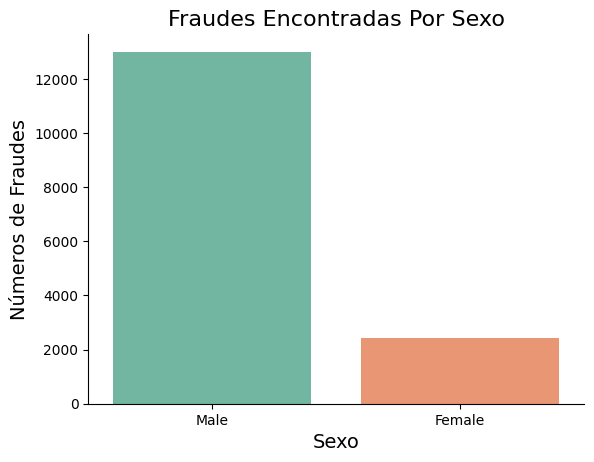

In [37]:
# Plotando um gráfico de barras baseado na quantidade de ocorrencias de fraudes 
# por sexo

sns.barplot(data=fraudePorSexo_df, 
            x='Sexo', 
            y='FraudeEncontrada', 
            hue='Sexo', palette='Set2')
sns.despine()

plt.title('Fraudes Encontradas Por Sexo', fontsize = 16)
plt.xlabel('Sexo', fontsize = 14)
plt.ylabel('Números de Fraudes', fontsize = 14)
plt.show()